# Descrição do projeto

A Oleobrás, uma empresa de mineração, tem como objetivo encontrar o local mais adequado para perfurar um novo poço de petróleo e, para isso, segue um conjunto de etapas bem definidas:

- Coleta de parâmetros: A primeira etapa consiste em coletar informações dos poços de petróleo na região selecionada. Os principais parâmetros analisados são a qualidade do petróleo e o volume de reservas.

- Construção de um modelo preditivo: Com base nos dados coletados, a empresa constrói um modelo preditivo que estimará o volume de reservas nos novos poços. Isso permite avaliar o potencial de cada local para obter uma estimativa do volume de petróleo recuperável.

- Seleção dos poços com maiores estimativas: Em seguida, a Oleobrás seleciona os poços de petróleo que apresentam as maiores estimativas de volume de reservas. Essa escolha é feita com base nas previsões fornecidas pelo modelo preditivo, visando maximizar o potencial de retorno.

- Escolha da região mais lucrativa: A última etapa é escolher a região que apresenta o maior lucro total para os poços de petróleo selecionados. Nessa fase, a empresa considera não apenas as estimativas de volume de reservas, mas também os custos operacionais, investimentos necessários e projeções de preço do petróleo para determinar a margem de lucro mais alta.

A fim de orientar a escolha da região com a margem de lucro mais alta, a Oleobrás utiliza a técnica de Bootstrapping para analisar o lucro potencial e os riscos associados. O Bootstrapping é uma abordagem estatística que permite simular cenários variados a partir de uma amostra de dados existente, possibilitando a avaliação de incertezas e riscos em projeções financeiras.

Com essa abordagem, a Oleobrás busca tomar decisões mais informadas e seguras, considerando diversos cenários possíveis, antes de investir em um novo poço de petróleo. Dessa forma, a empresa busca maximizar seus retornos e minimizar os riscos envolvidos na exploração de novas áreas.







# 1. Leitura Dados e Importe Bibliotecas

In [1]:
# Importe das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_geo_0 = pd.read_csv('geo_data_0.csv')
data_geo_1 = pd.read_csv('geo_data_1.csv')
data_geo_2 = pd.read_csv('geo_data_2.csv')

# 2. EDA,  Treino, Teste 

Nesta etapa, conduziremos uma análise exploratória de cada região e, em seguida, procederemos ao treinamento e teste do modelo para cada uma delas. O processo seguirá os seguintes passos:

- Análise exploratória: Inicialmente, realizaremos uma análise exploratória dos dados de cada região. Essa etapa nos permitirá compreender melhor as características e peculiaridades de cada conjunto de dados.

- Divisão dos dados: Em seguida, dividiremos os dados de cada região em um conjunto de treinamento e um conjunto de validação, utilizando uma proporção de 75% para treinamento e 25% para validação. Essa divisão é fundamental para avaliar o desempenho do modelo de forma adequada.

- Treinamento do modelo e predições: Realizaremos o treinamento do modelo utilizando o conjunto de treinamento e, com o modelo treinado, faremos predições para o conjunto de validação.

- Salvando predições e respostas corretas: Registraremos as predições geradas pelo modelo e compararemos com as respostas corretas para o conjunto de validação, permitindo uma análise comparativa posterior.

- Impressão dos resultados: Calcularemos o volume médio predito de reservas e o REQM (Erro Quadrático Médio Residual) do modelo para cada região.

- Análise dos resultados: Por fim, analisaremos os resultados obtidos em cada região, interpretando o volume médio predito de reservas e avaliando o REQM do modelo. Essa análise nos fornecerá informações valiosas sobre o desempenho do modelo em cada contexto específico.

Com esse processo completo, a empresa Oleobrás estará capacitada a tomar decisões mais embasadas e orientadas por dados, escolhendo a melhor região para a perfuração do novo poço de petróleo com base nas estimativas de reservas e nos resultados obtidos através do modelo preditivo.

### Análise Exploratória GEO_0

In [3]:
data_geo_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_geo_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


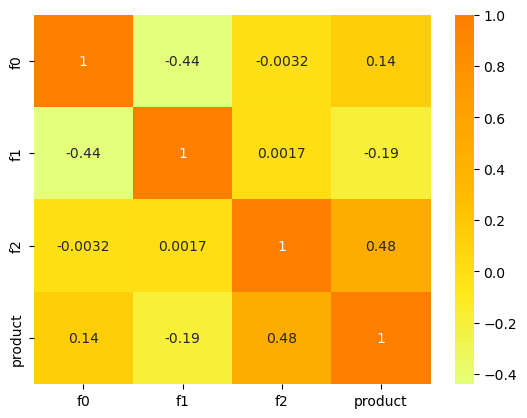

In [6]:
corr = data_geo_0.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

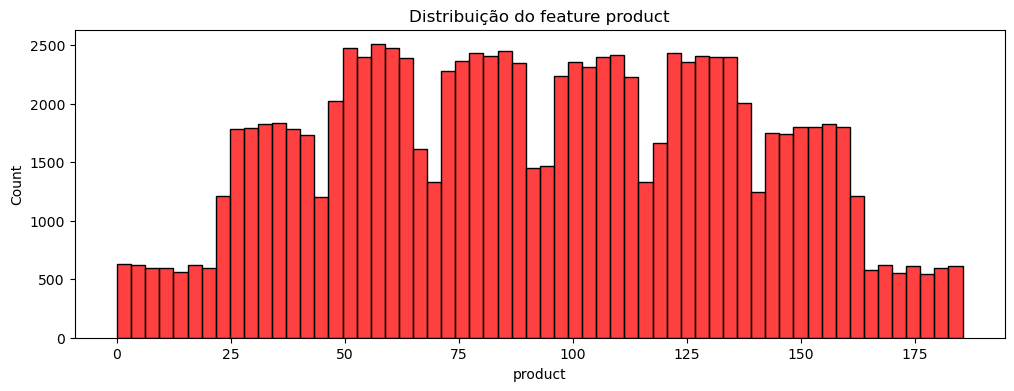

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data_geo_0['product'], color='r', ax=ax)
ax.set_title('Distribuição do feature product')

plt.show()

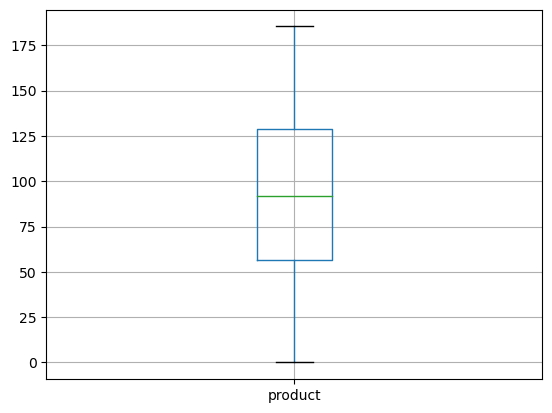

In [8]:
pd.DataFrame(data_geo_0['product']).boxplot();

#### Conclusão EAD - GEO_0

Ao examinar a região Geo_0 no gráfico de calor, podemos observar que as relações mais notáveis ocorrem entre a feature f2 e o produto. A análise da distribuição revela um padrão frequente na produção de petróleo, concentrado em valores de 50, 75, 100 e 125, com uma frequência de 1900. Esse padrão consistente é um indicador positivo da qualidade de produção, visto que demonstra uma frequência regular.

Além disso, a representação por meio do boxplot não apresenta valores atípicos (outliers), sugerindo uma distribuição relativamente homogênea. A mediana, situada em 91 mil de produção de petróleo, oferece uma estimativa do valor central dos dados e pode servir como uma referência para a produção média na região.

Em resumo, a análise do gráfico de calor destaca a relação positiva entre a feature f2 e o produto, revelando uma frequência consistente na produção de petróleo. O boxplot complementa essa informação, mostrando uma distribuição sem valores atípicos e uma mediana de aproximadamente 91 mil na produção de petróleo. Esses indicadores apontam para uma qualidade estável e promissora na produção de petróleo na região Geo_0.

### Treinando Modelo GEO_0

### Separando os Dados

In [40]:
# features
X = data_geo_0[['f0','f1','f2']]
# target
y = data_geo_0['product']

#separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Instanciando modelo
model = LinearRegression()

# Verificando qualidade do modelo
scores = cross_val_score(model, X, y, cv=5)
final_score = sum(scores) / len(scores)

print('Pontuação média de avaliação do modelo:', final_score)

Pontuação média de avaliação do modelo: 0.27549130726904475


In [10]:
# Treinamento
model.fit(X_train,y_train)
# predição
y_pred_geo_0 = model.predict(X_test)
result = mean_squared_error(y_test, y_pred_geo_0)**0.5
print('O valor médio predito do volume de reservas no poço de petróleo GEO_0 é: ',y_pred_geo_0.mean())
print("O REQM do modelo de regressão linear no conjunto de validação:", result)

O valor médio predito do volume de reservas no poço de petróleo GEO_0 é:  92.5104154649187
O REQM do modelo de regressão linear no conjunto de validação: 37.565439320716095


### Análise Explorátória GEO_1

In [11]:
data_geo_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [12]:
data_geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
data_geo_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


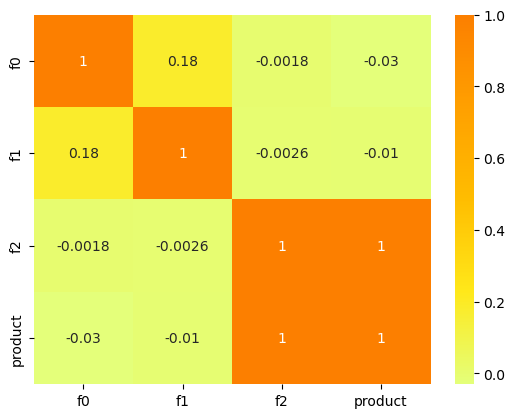

In [14]:
corr = data_geo_1.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

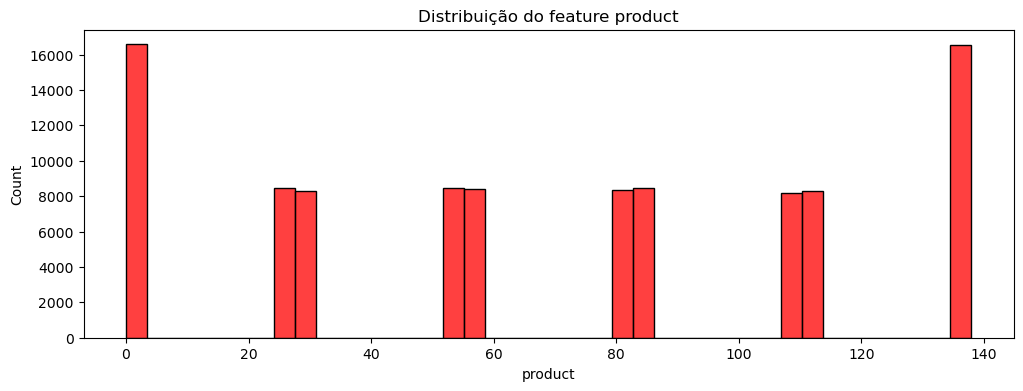

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data_geo_1['product'], color='r', ax=ax)
ax.set_title('Distribuição do feature product')

plt.show()

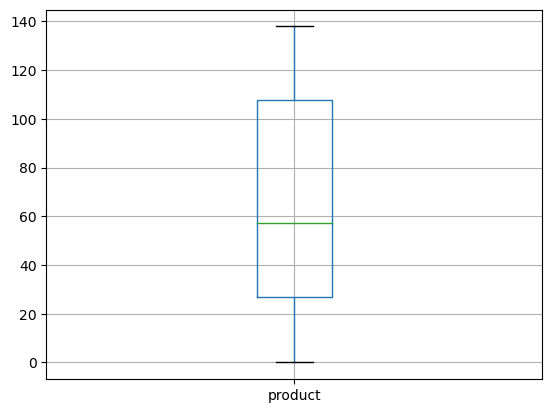

In [16]:
pd.DataFrame(data_geo_1['product']).boxplot();

#### Conclusão EAD - GEO_1

Dentro do gráfico de mapa de cor, é possível observar uma forte relação de 100% entre o produto e a feature f2. No entanto, ao analisar a distribuição, percebe-se que não há uma frequência uniforme na produção de petróleo, mas sim uma regularidade entre os níveis de produção que variam de 20 a 120. A frequência média que fica em torno de 8 mil, com picos altos de baixa produção chegando próximo a zero e um máximo em torno de 140.

No gráfico de boxplot, a mediana da produção de petróleo é encontrada em torno de 57 mil. Essa medida representa o valor central dos dados, indicando a tendência da produção na região.

Em resumo, o gráfico de mapa de cor evidencia uma forte relação entre o produto e a feature f2. Já a análise da distribuição revela uma regularidade nos níveis de produção de petróleo, com frequência média em torno de 8 mil e ocorrência de picos altos e baixos. O gráfico de boxplot confirma a mediana em aproximadamente 57 mil na produção de petróleo, fornecendo uma medida resumida da distribuição dos dados.

### Treinando Modelo GEO_1

### Separando os dados

In [17]:
# features
X = data_geo_1[['f0','f1','f2']]
# target
y = data_geo_1['product']

#separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Instanciando modelo
model = LinearRegression()

# Verificando qualidade do modelo
scores = cross_val_score(model, X, y, cv=5)
final_score = sum(scores) / len(scores)

print('Pontuação média de avaliação do modelo:', final_score)

Pontuação média de avaliação do modelo: 0.9996243728923553


In [18]:
# Treinando modelo
model.fit(X_train,y_train)
# predição
y_pred_geo_1 = model.predict(X_test)
result = mean_squared_error(y_test, y_pred_geo_1)**0.5
print('O valor médio predito do volume de reservas no poço de petróleo GEO_1 é: ',y_pred_geo_1.mean())
print("O REQM do modelo de regressão linear no conjunto de validação:", result)

O valor médio predito do volume de reservas no poço de petróleo GEO_1 é:  68.73437953097319
O REQM do modelo de regressão linear no conjunto de validação: 0.8942496902723637


### Análise Exploratória GEO_2

In [19]:
data_geo_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [20]:
data_geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [21]:
data_geo_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


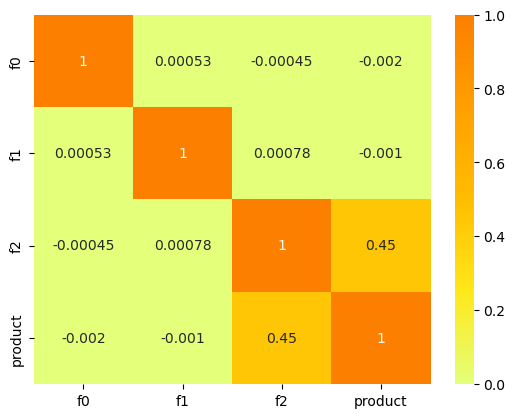

In [22]:
corr = data_geo_2.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

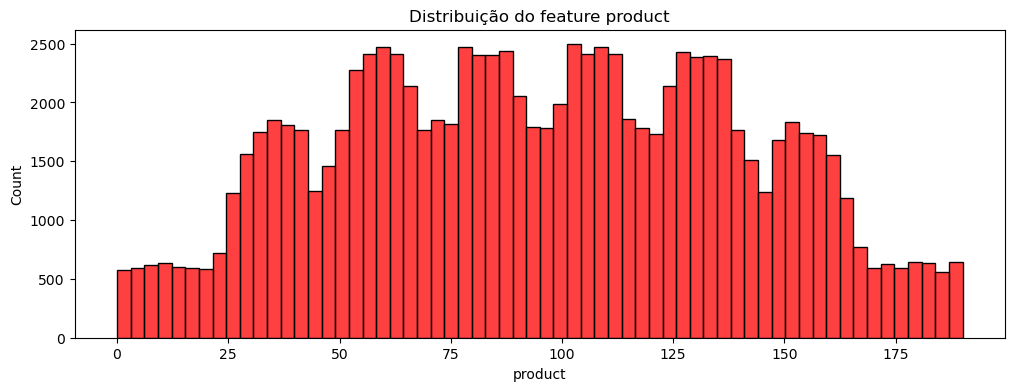

In [23]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data_geo_2['product'], color='r', ax=ax)
ax.set_title('Distribuição do feature product')

plt.show()

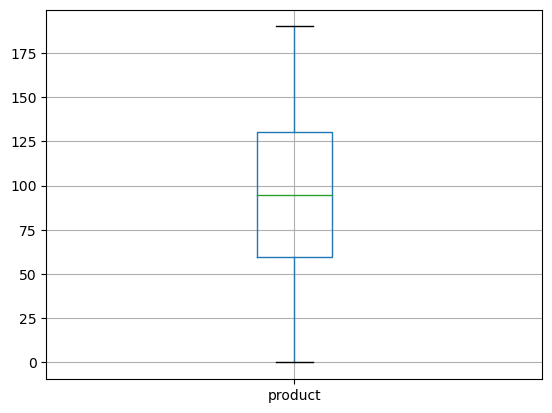

In [24]:
pd.DataFrame(data_geo_2['product']).boxplot();

#### Conclusão EAD - GEO_2

Dentro das avaliações do GEO_2 no mapa de cor, assim como nos demais, a relação entre a feature f2 e o produto continua bastante evidente. A frequência de distribuição apresenta padrões concentrados entre os valores de 50 a 125. Nota-se que GEO_0 e GEO_1 são os que se aproximam mais de uma distribuição normal, indicando uma tendência mais equilibrada em seus dados.

No gráfico de boxplot, não são observados outliers, sugerindo uma distribuição mais homogênea dos dados. A mediana, que se encontra em torno de 94, indica o valor central da produção de petróleo na região. Além disso, a distribuição dos bigodes e quartis (Q1 a Q3) apresenta uma ótima proporção, o que contribui para uma análise mais consistente dos dados.

Em resumo, as avaliações do GEO_2 no mapa de cor reforçam a relação entre a feature f2 e o produto. A distribuição de frequência exibe padrões entre 50 e 125. GEO_0 e GEO_1 se destacam por uma distribuição mais próxima do normal. O gráfico de boxplot, por sua vez, evidencia a ausência de outliers e uma mediana em torno de 94, além de uma distribuição balanceada entre os bigodes e quartis. Isso indica uma distribuição de produção de petróleo na região com maior estabilidade e consistência.

### Treinando Modelo GEO 2

### Separando os dados 

In [25]:
# features
X = data_geo_2[['f0','f1','f2']]
# target
y = data_geo_2['product']

#separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Instanciando modelo
model = LinearRegression()

# Verificando qualidade do modelo
scores = cross_val_score(model, X, y, cv=5)
final_score = sum(scores) / len(scores)

print('Pontuação média de avaliação do modelo:', final_score)

Pontuação média de avaliação do modelo: 0.1987156246205129


In [26]:
# Treinando modelo
model.fit(X_train,y_train)
# predição
y_pred_geo_2 = model.predict(X_test)
result = mean_squared_error(y_test, y_pred_geo_2)**0.5
print('O valor médio predito do volume de reservas no poço de petróleo GEO_2 é: ',y_pred_geo_2.mean())
print("O REQM do modelo de regressão linear no conjunto de validação:", result)

O valor médio predito do volume de reservas no poço de petróleo GEO_2 é:  95.15372602776011
O REQM do modelo de regressão linear no conjunto de validação: 39.94745048231238


# 3. Preparação para o cálculo de lucro

Nesta etapa, vamos armazenar todos os valores necessários para os cálculos em variáveis separadas.

Primeiramente, calcularemos o volume de reservas suficiente para desenvolver um novo poço sem prejuízos financeiros. Em seguida, iremos comparar o valor obtido com o valor médio de reservas em cada região.

Com base nessa análise, forneceremos conclusões sobre a preparação para a etapa de cálculo de lucro. Essas conclusões serão fundamentais para guiar a tomada de decisão da empresa Oleobrás, permitindo identificar quais regiões apresentam reservas suficientes para justificar a perfuração de novos poços com segurança financeira.

Ao armazenar os valores relevantes em variáveis distintas e comparar esses dados com as médias de reservas em cada região, a Oleobrás estará apta a fazer uma avaliação criteriosa das oportunidades disponíveis e determinar quais regiões possuem maior potencial de lucro e retorno sobre o investimento. Essa preparação para a etapa de cálculo de lucro garantirá que a empresa possa prosseguir com maior confiança na seleção da região mais promissora para seus projetos de exploração de petróleo.

### GEO_0

In [27]:
# 3.2. Calcule o volume de reservas suficiente para desenvolver um novo poço sem prejuizos. 
# Compare o valor recebido com o valor médio de reservas em cada região.

print('A média real do poço GEO_0 é de : ',data_geo_0['product'].mean())
print('A média predita para o poço GEO_0 é de ',y_pred_geo_0.mean())

geo_0_dif_reserva = (data_geo_0['product'].mean()) - (y_pred_geo_0.mean())
print('A diferança entre real e predito é de : ',geo_0_dif_reserva)


A média real do poço GEO_0 é de :  92.50000000000001
A média predita para o poço GEO_0 é de  92.5104154649187
A diferança entre real e predito é de :  -0.010415464918679618


### GEO_1

In [28]:
# 3.2. Calcule o volume de reservas suficiente para desenvolver um novo poço sem prejuizos. 
# Compare o valor recebido com o valor médio de reservas em cada região.

print('A média real do poço GEO_1 é de : ',data_geo_1['product'].mean())
print('A média predita para o poço GEO_1 é de ',y_pred_geo_1.mean())

geo_1_dif_reserva = (data_geo_1['product'].mean()) - (y_pred_geo_1.mean())
print('A diferança entre real e predito é de : ',geo_1_dif_reserva)

A média real do poço GEO_1 é de :  68.82500000000002
A média predita para o poço GEO_1 é de  68.73437953097319
A diferança entre real e predito é de :  0.09062046902683107


### GEO_2

In [29]:
# 3.2. Calcule o volume de reservas suficiente para desenvolver um novo poço sem prejuizos. 
# Compare o valor recebido com o valor médio de reservas em cada região.

print('A média real do poço GEO_2 é de : ',data_geo_2['product'].mean())
print('A média predita para o poço GEO_2 é de ',y_pred_geo_2.mean())

geo_2_dif_reserva = (data_geo_2['product'].mean()) - (y_pred_geo_2.mean())
print('A diferança entre real e predito é de : ',geo_2_dif_reserva)

A média real do poço GEO_2 é de :  95.00000000000004
A média predita para o poço GEO_2 é de  95.15372602776011
A diferança entre real e predito é de :  -0.15372602776007227


#### Conclusão Intermediária

Ao analisarmos as médias de produtividade de barris de óleo em cada região de poços, obtivemos insumos importantes para prosseguir com as próximas avaliações. Os resultados são os seguintes:

A maior média de produtividade de barris de óleo é encontrada na região GEO_2, seguida de perto pela região GEO_0, e a região GEO_1 apresenta a menor produtividade.
Além disso, ao realizarmos a predição de cada região em relação aos seus valores reais, o modelo demonstrou uma boa precisão, com diferenças entre as predições e os valores reais em torno de 0,09% a -0,15%. Essas informações indicam que as previsões estão muito próximas dos valores reais da produção de petróleo em cada região, evidenciando uma ótima assertividade nas predições.

Em resumo, os dados mostram que GEO_2 possui a maior média de produtividade, GEO_0 é próxima em produtividade e GEO_1 tem a menor produtividade. Além disso, as previsões do modelo têm uma excelente precisão, com uma margem mínima de diferença em relação aos valores reais de produção de petróleo em cada região.

# 4. Calcular lucro do conjunto 







Dentro desta etapa, iremos calcular o lucro de um conjunto de poços de petróleo selecionados e suas predições do modelo. Para isso, seguiremos os seguintes passos:

- Escolher os poços com os valores mais altos de predições: Com base nas predições do modelo, selecionaremos os poços de petróleo que apresentam as maiores estimativas de volume de reservas.

- Sumarizar o volume alvo de reservas: Vamos somarizar o volume total de reservas dos poços selecionados, de acordo com as predições do modelo.

- Apresentar conclusões: Com os poços selecionados e o volume estimado de reservas, sugeriremos uma região específica para o desenvolvimento de poços de petróleo. Justificaremos nossa escolha com base nas análises e critérios utilizados ao longo do processo.

- Calcular o lucro que por fim, calcularemos o lucro total potencial para o volume de reservas recebido. Essa análise nos permitirá avaliar o faturamento bruto.

Essa função nos auxiliará a tomar uma decisão informada e embasada sobre a região mais promissora para o desenvolvimento de poços de petróleo, levando em conta o potencial de lucro e os resultados do modelo preditivo. Dessa forma, a empresa Oleobrás poderá direcionar seus recursos de forma mais estratégica e aproveitar oportunidades que maximizem seus retornos de investimento.

In [30]:
resumo = (y_pred_geo_0 + y_pred_geo_2) / 2 
print(resumo.mean())

93.8320707463394


In [31]:
y_pred_geo_0 = pd.Series(y_pred_geo_0)
y_pred_geo_2 = pd.Series(y_pred_geo_2)


#  diferença real entre as médias nos grupos
AB_difference = y_pred_geo_0.mean() - y_pred_geo_2.mean()
AB_difference_abs = abs(AB_difference)
print("Diferença entre os poços de predições mais altos:", AB_difference_abs)

alpha = 0.05
    
state = np.random.RandomState(12345)

bootstrap_samples = 1000
count = 0
for i in range(bootstrap_samples):
    united_samples = pd.concat([y_pred_geo_0, y_pred_geo_2])
    subsample = united_samples.sample(frac=1, replace=True, random_state=state)
    
    subsample_A = subsample[:len(y_pred_geo_0)]
    subsample_B = subsample[len(y_pred_geo_2):]
    bootstrap_difference = y_pred_geo_2.mean() - y_pred_geo_0.mean()
    
    if bootstrap_difference >= AB_difference:
        count += 1

pvalue = 1. * count / bootstrap_samples
print('p-value =', pvalue)

if pvalue < alpha:
    print("Rejeitar a hipótese nula: Os poços possuem médias equivalentes")
else:
    print("Falha ao rejeitar a hipótese nula: Os poços não possuem médias equivalentes")

Diferença entre os poços de predições mais altos: 2.643310562841421
p-value = 1.0
Falha ao rejeitar a hipótese nula: Os poços não possuem médias equivalentes


#### Conclusão Intermediária

Após selecionarmos os poços GEO_0 e GEO_2, os mais produtivos com base nas predições, constatamos que a média predita entre esses dois poços é de aproximadamente 93 mil barris. Em resumo, podemos afirmar que, para garantir segurança em termos de lucratividade, o novo poço deve ter uma média de produção igual ou superior a esse valor, assegurando que não trará prejuízos para a empresa.

Entretanto, é crucial realizar um teste de hipótese para uma avaliação estatística e consistente, comparando-os em um teste A/B. Ao analisar a diferença exata entre as predições dos dois poços, verificamos que o GEO_2 tem cerca de 2.64 mil barris a mais de produção em relação ao GEO_0. Selecionamos uma amostra de 1000 observações e comparamos as diferenças das predições, gerando um valor de p-valor para o cálculo estatístico.

O resultado do teste de hipótese apontou que falhamos em rejeitar a hipótese nula (H0), indicando que as médias de produção são de fato diferentes entre as duas regiões. Isso sugere que uma das regiões é mais vantajosa em termos de produtividade em relação à outra.

Em conclusão, o teste estatístico reforça a importância de considerar o valor médio de produção ao avaliar a lucratividade e a viabilidade de novos poços. Além disso, ressalta-se que a região GEO_2 apresenta uma média de produção mais alta e, portanto, é considerada mais vantajosa em termos de produtividade em comparação com GEO_0.

# 5. Calculo de risco para cada região

Para esta etapa, iremos calcular o risco para cada região utilizando a técnica de bootstrapping com 1000 amostras para encontrar a distribuição de lucros.

Em seguida, encontraremos o lucro médio, o intervalo de confiança de 95% e o risco de prejuízo. O prejuízo será calculado como uma probabilidade e posteriormente expresso como uma porcentagem.

Após analisar os resultados obtidos com o bootstrapping, apresentaremos nossas conclusões e sugeriremos uma região para o desenvolvimento de poços de petróleo. Essa sugestão será justificada com base na avaliação do risco, do lucro médio e da confiabilidade dos intervalos de confiança para cada região.

Ao utilizar o bootstrapping e avaliar o risco de prejuízo com probabilidade expressa em porcentagem, a empresa Oleobrás poderá tomar uma decisão mais sólida e consciente quanto à região mais adequada para investir em poços de petróleo. Essa abordagem permitirá considerar as incertezas e riscos inerentes ao processo de exploração, auxiliando na escolha de uma região que ofereça maior potencial de retorno e menor probabilidade de prejuízos financeiros.

### Geo_0

In [32]:
best_place = y_pred_geo_0
best_place = pd.Series(best_place)

state = np.random.RandomState(12345)

values = []
for i in range(1000):
    sub_exemplo = best_place.sample(frac=1, replace=True, random_state=state)
    values.append(sub_exemplo.quantile(0.50))

values = pd.Series(values)
    
lower = values.quantile(0.05)
upper = values.quantile(0.95)

print(lower)
print(upper)

92.2913599989568
92.87874403169444


### Geo_1

In [33]:
best_place = y_pred_geo_1
best_place = pd.Series(best_place)

state = np.random.RandomState(12345)

values = []
for i in range(1000):
    sub_exemplo = best_place.sample(frac=1, replace=True, random_state=state)
    values.append(sub_exemplo.quantile(0.50))

values = pd.Series(values)
    
lower = values.quantile(0.05)
upper = values.quantile(0.95)

print(lower)
print(upper)

57.55810834068147
79.8888612379764


### Geo_2

In [34]:
best_place = y_pred_geo_2
best_place = pd.Series(best_place)

state = np.random.RandomState(12345)

values = []
for i in range(1000):
    sub_exemplo = best_place.sample(frac=1, replace=True, random_state=state)
    values.append(sub_exemplo.quantile(0.50))

values = pd.Series(values)
    
lower = values.quantile(0.05)
upper = values.quantile(0.95)

print(lower)
print(upper)

94.83033441525212
95.37826006839457


In [35]:
# Calculo faturamento bruto
valor_petroleo = 94.83

Faturamento_Bruto = lower * valor_petroleo
print('Faturamento Bruto: ',Faturamento_Bruto)

Faturamento Bruto:  8992.760612598358


#### Conclusão Intermediária

Durante a realização dos testes para detectar com maior precisão a região adequada para a construção de novos poços, obtivemos um retorno significativo na área correspondente aos poços de GEO_2, apresentando uma média preditiva de 94.83 mil barris de petróleo. Por outro lado, a região de GEO_1 registrou a menor média preditiva.

## Conclusão Geral

Site Investing - https://br.investing.com/commodities/brent-oil-historical-data

Nesta etapa final, conduzimos um teste comparativo com 1000 amostras usando a técnica de bootstrapping, que consiste em selecionar aleatoriamente um volume de amostras para determinar, com um nível de confiança de 95%, a melhor região para a criação de novos poços de petróleo. Para cada região, calculamos a mediana como valor de amostragem e determinamos o valor com nível de confiança de 95% para todos os poços.

O resultado mostrou que a região GEO_2 apresenta o melhor retorno, com um valor mínimo de confiança de 94 mil barris de produção de petróleo. Com base nesse resultado, podemos afirmar com segurança que essa região é a mais adequada para a construção de um novo poço de petróleo, e o valor de 94 mil barris deve ser o alvo médio seguro para evitar prejuízos.

De acordo com o site Investing, o valor do petróleo hoje está em 84,47 dólares por barril. Ao realizar o cálculo, o faturamento bruto estimado é de 8,992 milhões de dólares.

Dessa forma, com a análise estatística e os dados atuais do mercado de petróleo, podemos concluir que a região GEO_2 é a melhor opção para a instalação de novos poços, com um valor médio seguro de 94 mil barris de produção. Essa escolha tem o potencial de gerar um faturamento bruto significativo, aproximando-se de 9 milhões.
